In [7]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.layers import Input, Conv2D, Dense, Flatten, Dropout, GlobalAveragePooling2D, \
    BatchNormalization, MaxPooling2D
from tensorflow.keras.models import Model

In [2]:
# Load in the data
cifar10 = tf.keras.datasets.cifar10

(x_train, y_train), (x_test, y_test) = cifar10.load_data()
x_train = x_train / 255.0
x_test  = x_test  / 255.0
y_train = y_train.flatten()
y_test  = y_test .flatten()

In [3]:
print(f'x_train: {x_train.shape}')
print(f'y_train: {y_train.shape}')

x_train: (50000, 32, 32, 3)
y_train: (50000,)


In [4]:
K = len(set(y_train))
print(f'Number of classes: {K}')

Number of classes: 10


In [8]:
# Build the model using the Functional API
i = Input(shape=x_train[0].shape)
x = Conv2D(filters=32,  kernel_size=(3, 3), activation='relu', padding='same')(i)
x = BatchNormalization()(x)
x = Conv2D(filters=32,  kernel_size=(3, 3), activation='relu', padding='same')(x)
x = BatchNormalization()(x)
x = MaxPooling2D(pool_size=(2, 2))(x)

x = Conv2D(filters=64,  kernel_size=(3, 3), activation='relu', padding='same')(x)
x = BatchNormalization()(x)
x = Conv2D(filters=64,  kernel_size=(3, 3), activation='relu', padding='same')(x)
x = BatchNormalization()(x)
x = MaxPooling2D(pool_size=(2, 2))(x)

x = Conv2D(filters=128, kernel_size=(3, 3), activation='relu', padding='same')(x)
x = BatchNormalization()(x)
x = Conv2D(filters=128, kernel_size=(3, 3), activation='relu', padding='same')(x)
x = BatchNormalization()(x)
x = MaxPooling2D(pool_size=(2, 2))(x)

x = Flatten()(x)
x = Dropout(rate=0.2)(x)
x = Dense(units=1024, activation='relu')(x)
x = Dropout(rate=0.2)(x)
x = Dense(units=K,    activation='softmax')(x)

model = Model(i, x)

# Compile and fit
model.compile(  optimizer='adam',
                loss='sparse_categorical_crossentropy',
                metrics=['accuracy'])
r = model.fit(x_train, y_train, validation_data=(x_test, y_test), epochs=15)

Epoch 1/15
1563/1563 [==============================] - 226s 144ms/step - loss: 1.2962 - accuracy: 0.5530 - val_loss: 1.0731 - val_accuracy: 0.6336
Epoch 2/15
1563/1563 [==============================] - 212s 136ms/step - loss: 0.8334 - accuracy: 0.7095 - val_loss: 0.8237 - val_accuracy: 0.7162
Epoch 3/15
1563/1563 [==============================] - 229s 146ms/step - loss: 0.6794 - accuracy: 0.7661 - val_loss: 0.7836 - val_accuracy: 0.7329
Epoch 4/15
1563/1563 [==============================] - 201s 129ms/step - loss: 0.5738 - accuracy: 0.8044 - val_loss: 0.6916 - val_accuracy: 0.7671
Epoch 5/15
1563/1563 [==============================] - 214s 137ms/step - loss: 0.4855 - accuracy: 0.8331 - val_loss: 0.7085 - val_accuracy: 0.7640
Epoch 6/15
1563/1563 [==============================] - 217s 139ms/step - loss: 0.4190 - accuracy: 0.8552 - val_loss: 0.6121 - val_accuracy: 0.8021
Epoch 7/15
1563/1563 [==============================] - 215s 138ms/step - loss: 0.3573 - accuracy: 0.8773 - val_

In [ ]:
# Fit with data augmentation
batch_size = 32
data_generator  = tf.keras.preprocessing.image.ImageDataGenerator(
    width_shift_range=0.1, height_shift_range=0.1, horizontal_flip=True)
train_generator = data_generator.flow(x_train, y_train, batch_size)
steps_per_epoch = x_train.shape[0] // batch_size
r = model.fit(  train_generator, validation_data=(x_test, y_test), 
                steps_per_epoch=steps_per_epoch, epochs=50)


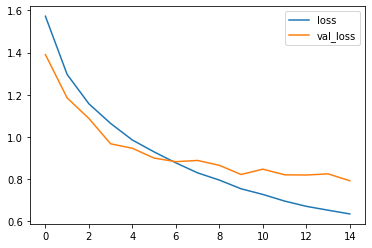

In [7]:
# Loss per iteration
import matplotlib.pyplot as plt

plt.plot(r.history['loss'], label='loss')
plt.plot(r.history['val_loss'], label='val_loss')
plt.legend()

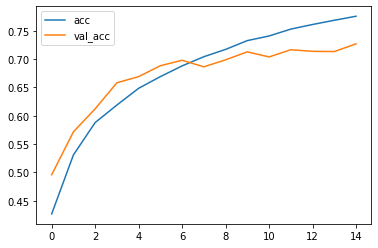

In [8]:
# Accuracy per iteration
plt.plot(r.history['accuracy'], label='acc')
plt.plot(r.history['val_accuracy'], label='val_acc')
plt.legend()